# XGBoost Model

In [2]:
import datetime as dt
import time
from datetime import date
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math
from xgboost import XGBRegressor

In [4]:
X_train = pd.read_csv('../datasets/X_train.csv')
y_train = pd.read_csv('../datasets/y_train.csv')
X_val = pd.read_csv('../datasets/X_val.csv')
y_val = pd.read_csv('../datasets/y_val.csv')
X_train_val = pd.read_csv('../datasets/X_train_val.csv')
y_train_val = pd.read_csv('../datasets/y_train_val.csv')
X_test = pd.read_csv('../datasets/X_test.csv')
y_test = pd.read_csv('../datasets/y_test.csv')
X_train_scaled = pd.read_csv('../datasets/X_train_scaled.csv')
y_train_scaled = pd.read_csv('../datasets/y_train_scaled.csv')
X_val_scaled = pd.read_csv('../datasets/X_val_scaled.csv')
X_train_val_scaled = pd.read_csv('../datasets/X_train_val_scaled.csv')
y_train_val_scaled = pd.read_csv('../datasets/y_train_val_scaled.csv')
X_test_scaled = pd.read_csv('../datasets/X_test_scaled.csv')
train =  pd.read_csv('../datasets/train.csv')
test =  pd.read_csv('../datasets/test.csv')
train_val =  pd.read_csv('../datasets/train_val.csv')
val =  pd.read_csv('../datasets/val.csv')

## Defining XGBoost Model & Evaluation Metrics 

In [3]:
def get_mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def get_rmse(y_true, y_pred): 
    
    return math.sqrt(mean_squared_error(y_true, y_pred))

def train_pred_eval_model(X_train_scaled, \
                          y_train_scaled, \
                          X_test_scaled, \
                          y_test, \
                          col_mean, \
                          col_std, \
                          seed, \
                          n_estimators, \
                          max_depth, \
                          learning_rate, \
                          min_child_weight, \
                          subsample, \
                          colsample_bytree, \
                          colsample_bylevel, \
                          gamma):

    model = XGBRegressor(objective ='reg:squarederror',seed=model_seed,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         gamma=gamma)
    

    model.fit(X_train_scaled, y_train_scaled)
    
    est_scaled = model.predict(X_test_scaled)
    est = est_scaled * col_std + col_mean

    rmse = get_rmse(y_test, est)
    mape = get_mape(y_test, est)
    
    return rmse, mape, est

# Default Parameters

In [4]:
#default params
n_estimators = 100                         
max_depth = 3                               
learning_rate = 0.1                         
min_child_weight = 1                  
subsample = 1                  
colsample_bytree = 1           
colsample_bylevel = 1          
gamma = 0                      
model_seed = 100

In [5]:
#Using the default parameters, test on train scaled and evaluate on validation scaled 

rmse_bef_tuning, mape_bef_tuning, pred = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_val_scaled, 
                                     y_val, 
                                     val['Close_mean'],
                                     val['Close_std'],
                                     seed = model_seed,
                     n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)


print("RMSE on val set = ",  round(rmse_bef_tuning, 3) ) 
print("MAPE on val set = ",  round(mape_bef_tuning, 3) ) 

RMSE on val set =  2672.734
MAPE on val set =  18.295


/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


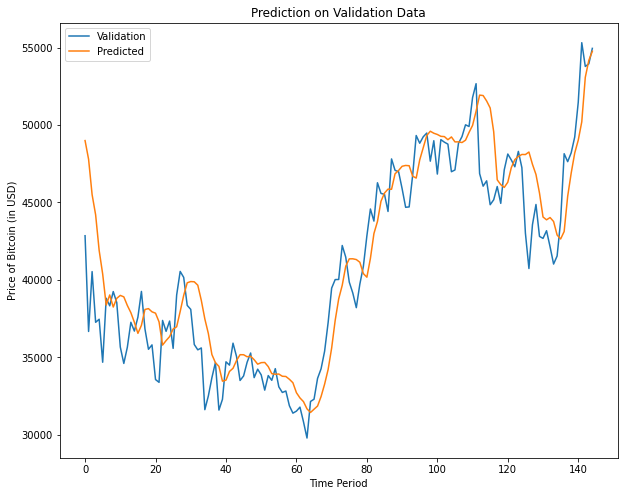

In [6]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

plt.plot(val['Close'], label = 'Validation') 
plt.plot(pred, label='Predicted')
plt.title("Prediction on Validation Data")
plt.xlabel("Time Period")
plt.ylabel("Price of Bitcoin (in USD)")
plt.legend()

# XGBoost : Hyperparameter Tuning

### No of Estimators, Max Depth 

In [7]:
param_label = 'n_estimators'
param_list = range(10, 500, 5)

param2_label = 'max_depth'
param2_list = [1, 2,3, 4, 5, 6, 7, 8, 9, 10]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}


for param in param_list:    
    for param2 in param2_list:
        rmse, mape, pred = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_val_scaled, 
                                     y_val, 
                                     val['Close_mean'],
                                     val['Close_std'],
                                     seed=model_seed,
                                     n_estimators=param, 
                                     max_depth=param2, 
                                     learning_rate=learning_rate, 
                                     min_child_weight=min_child_weight, 
                                     subsample=subsample, 
                                     colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=colsample_bylevel, 
                                     gamma=gamma)
    
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
error_rate   

/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and wil

,n_estimators,max_depth,rmse,mape_pct
0,10,1,2665.108021,18.207310
1,10,2,2649.240745,18.171925
2,10,3,2643.330304,18.169529
3,10,4,2650.756433,18.169360
4,10,5,2648.589629,18.171228
...,...,...,...,...
975,495,6,2679.051002,18.294612
976,495,7,2676.141717,18.288498
977,495,8,2677.089955,18.288271
978,495,9,2680.683301,18.297307


In [8]:
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
n_estimators_opt = temp['n_estimators'].values[0]
max_depth_opt = temp['max_depth'].values[0]
print("min RMSE = ", round(error_rate['rmse'].min(), 3) ) 
print("optimum params = ", n_estimators_opt, max_depth_opt)

min RMSE =  2643.33
optimum params =  10 3


In [9]:
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = ",  round(error_rate['mape_pct'].min(), 2))
print("optimum params = ", temp['n_estimators'].values[0], temp['max_depth'].values[0])

min MAPE =  18.17
optimum params =  10 8


### Learning Rate, Min Child Weights 

In [10]:
param_label = 'learning_rate'
param_list = list(np.arange(0.001, 1, 0.005)) 


param2_label = 'min_child_weight'
param2_list = range(1, 21, 1)

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}

for param in (param_list):
    
    for param2 in param2_list:
        rmse, mape, pred = train_pred_eval_model(X_train_scaled, 
                                    y_train_scaled, 
                                     X_val_scaled, 
                                     y_val, 
                                     val['Close_mean'],
                                     val['Close_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt, 
                                     max_depth=max_depth_opt, 
                                     learning_rate=param, 
                                     min_child_weight=param2, 
                                     subsample=subsample, 
                                     colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=colsample_bylevel, 
                                     gamma=gamma)
    
    
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)

error_rate   

/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and wil

,learning_rate,min_child_weight,rmse,mape_pct
0,0.001,1,2609.129053,17.967657
1,0.001,2,2609.129053,17.967657
2,0.001,3,2609.129053,17.967657
3,0.001,4,2609.129053,17.967657
4,0.001,5,2609.129053,17.967657
...,...,...,...,...
3995,0.996,16,2652.001157,18.281113
3996,0.996,17,2657.212709,18.284191
3997,0.996,18,2666.090768,18.301665
3998,0.996,19,2657.433150,18.300481


In [11]:
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
learning_rate_opt = temp['learning_rate'].values[0]
min_child_weight_opt = temp['min_child_weight'].values[0]
print("min RMSE = ", error_rate['rmse'].min())
print("optimum params = ",
learning_rate_opt, min_child_weight_opt)

min RMSE =  2609.0371287523258
optimum params =  0.001 20


In [12]:
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = ", round(error_rate['mape_pct'].min(), 3))
print("optimum params = ", 
temp['learning_rate'].values[0], temp['min_child_weight'].values[0])

min MAPE =  17.967
optimum params =  0.001 20


### Subsample, gamma

In [13]:
param_label = 'subsample'
param_list = list(np.arange(0.1, 1, 0.1))  

param2_label = 'gamma'
param2_list = list(np.arange(0.01, 1, 0.01))  

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}

for param in (param_list):
    for param2 in param2_list:
        rmse, mape, pred = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_val_scaled, 
                                     y_val, 
                                     val['Close_mean'],
                                     val['Close_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt, 
                                     max_depth=max_depth_opt, 
                                     learning_rate=learning_rate_opt, 
                                     min_child_weight=min_child_weight_opt, 
                                     subsample=param, 
                                     colsample_bytree=colsample_bytree, 
                                     colsample_bylevel=colsample_bylevel, 
                                     gamma=param2)
    
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
error_rate   

/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and wil

,subsample,gamma,rmse,mape_pct
0,0.1,0.01,2608.857262,17.964819
1,0.1,0.02,2608.857262,17.964819
2,0.1,0.03,2608.857262,17.964819
3,0.1,0.04,2608.857262,17.964819
4,0.1,0.05,2608.857262,17.964819
...,...,...,...,...
886,0.9,0.95,2609.290743,17.968298
887,0.9,0.96,2609.290743,17.968298
888,0.9,0.97,2609.290743,17.968298
889,0.9,0.98,2609.290743,17.968298


In [14]:
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
subsample_opt = temp['subsample'].values[0]
gamma_opt = temp['gamma'].values[0]
print("min RMSE = ", round(error_rate['rmse'].min(), 3))
print("optimum params = ",
subsample_opt, gamma_opt)

min RMSE =  2608.857
optimum params =  0.1 0.01


In [15]:
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = ", round(error_rate['mape_pct'].min(), 3))
print("optimum params = ",
temp['subsample'].values[0], temp['gamma'].values[0])

min MAPE =  17.965
optimum params =  0.1 0.01


### colsample_bytree, colsample_bylevel

In [16]:
param_label = 'colsample_bytree'
param_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

param2_label = 'colsample_bylevel'
param2_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}

for param in (param_list):    
    for param2 in param2_list:
        rmse, mape, pred = train_pred_eval_model(X_train_scaled, 
                                     y_train_scaled, 
                                     X_val_scaled, 
                                     y_val, 
                                     val['Close_mean'],
                                     val['Close_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt, 
                                     max_depth=max_depth_opt, 
                                     learning_rate=learning_rate_opt, 
                                     min_child_weight=min_child_weight_opt, 
                                     subsample=subsample_opt, 
                                     colsample_bytree=param, 
                                     colsample_bylevel=param2, 
                                     gamma=gamma_opt)
    
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
error_rate   



/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and wil

,colsample_bytree,colsample_bylevel,rmse,mape_pct
0,0.5,0.5,2608.848303,17.964802
1,0.5,0.6,2608.851189,17.964807
2,0.5,0.7,2608.855758,17.964816
3,0.5,0.8,2608.855758,17.964816
4,0.5,0.9,2608.856660,17.964817
5,0.5,1.0,2608.856660,17.964817
6,0.6,0.5,2608.856360,17.964817
7,0.6,0.6,2608.856360,17.964817
8,0.6,0.7,2608.856420,17.964817
9,0.6,0.8,2608.856660,17.964817


In [17]:
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
colsample_bytree_opt = temp['colsample_bytree'].values[0]
colsample_bylevel_opt = temp['colsample_bylevel'].values[0]
print("min RMSE = ", round(error_rate['rmse'].min(), 3))
print("optimum params = ", colsample_bytree_opt, colsample_bylevel_opt)

min RMSE =  2608.848
optimum params =  0.5 0.5


In [18]:
# Get optimum value for param and param2, using MAPE
# We will use RMSE to decide the final optimum params to use
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = ", round(error_rate['mape_pct'].min(), 3))
print("optimum params = ",
temp['colsample_bytree'].values[0], temp['colsample_bylevel'].values[0])

min MAPE =  17.965
optimum params =  0.8 0.5


# Tuned params

In [19]:
d = {'param': ['n_estimators', 'max_depth', 'learning_rate', 'min_child_weight', 'subsample', 'colsample_bytree', 'colsample_bylevel', 'gamma', 'rmse', 'mape_pct'],
     'original': [n_estimators, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree, colsample_bylevel, gamma, rmse_bef_tuning, mape_bef_tuning],
     'after_tuning': [n_estimators_opt, max_depth_opt, learning_rate_opt, min_child_weight_opt, subsample_opt, colsample_bytree_opt, colsample_bylevel_opt, gamma_opt, error_rate['rmse'].min(), error_rate['mape_pct'].min()]}
tuned_params = pd.DataFrame(d)
tuned_params = tuned_params
tuned_params

,param,original,after_tuning
0,n_estimators,100.000000,10.000000
1,max_depth,3.000000,3.000000
2,learning_rate,0.100000,0.001000
3,min_child_weight,1.000000,20.000000
4,subsample,1.000000,0.100000
5,colsample_bytree,1.000000,0.500000
6,colsample_bylevel,1.000000,0.500000
7,gamma,0.000000,0.010000
8,rmse,2672.733513,2608.848303
9,mape_pct,18.295096,17.964578


In [20]:
start = time.time()

rmse, mape, pred = train_pred_eval_model(X_train_val_scaled, 
                             y_train_val_scaled, 
                             X_test_scaled, 
                             y_test, 
                             test['Close_mean'],
                             test['Close_std'],
                             seed=model_seed,
                             n_estimators=n_estimators_opt, 
                             max_depth=max_depth_opt, 
                             learning_rate=learning_rate_opt, 
                             min_child_weight=min_child_weight_opt, 
                             subsample=subsample_opt, 
                             colsample_bytree=colsample_bytree_opt, 
                             colsample_bylevel=colsample_bylevel_opt, 
                             gamma=gamma_opt)


end = time.time()

time_elapsed = end - start
print("Time Elapse = ", time_elapsed)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)

# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

Time Elapse =  0.029498815536499023
RMSE on test set = 2560.192
MAPE on test set = 21.800%


/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


# AutoCorrelation Analysis

In [21]:
pred5 = pred
pred4 = pred
pred3 = pred
pred2 = pred
pred1 = pred
pred5

0      54645.755507
1      54858.910119
2      55707.208217
3      56094.994181
4      56749.473194
           ...     
140    38827.688372
141    38755.257549
142    40584.030637
143    42186.320923
144    43192.760583
Length: 145, dtype: float64

In [22]:
y_test1 = y_test
y_test2 = y_test
y_test3 = y_test
y_test4 = y_test
y_test5 = y_test
y_test5

,Close
0,54663.6
1,57471.9
2,56004.5
3,57367.2
4,57344.9
...,...
140,37706.7
141,43179.8
142,44428.2
143,43896.9


In [23]:
delay_df_5 = y_test5.merge(pred5.to_frame(), left_index=True, right_index=True)
delay_df_5 = delay_df_5.reset_index()
delay_df_5 = delay_df_5.drop(columns=['index'])
delay_df_5 = delay_df_5.to_numpy()
delay_df_5 = delay_df_5.flatten()
indexer_5 = np.arange(10)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

delay_df_4 = y_test4.merge(pred4.to_frame(), left_index=True, right_index=True)
delay_df_4 = delay_df_4.reset_index()
delay_df_4 = delay_df_4.drop(columns=['index'])
delay_df_4 = delay_df_4.to_numpy()
delay_df_4 = delay_df_4.flatten()
indexer_4 = np.arange(8)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

delay_df_3 = y_test3.merge(pred3.to_frame(), left_index=True, right_index=True)
delay_df_3 = delay_df_3.reset_index()
delay_df_3 = delay_df_3.drop(columns=['index'])
delay_df_3 = delay_df_3.to_numpy()
delay_df_3 = delay_df_3.flatten()
indexer_3 = np.arange(6)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

delay_df_2 = y_test2.merge(pred2.to_frame(), left_index=True, right_index=True)
delay_df_2 = delay_df_2.reset_index()
delay_df_2 = delay_df_2.drop(columns=['index'])
delay_df_2 = delay_df_2.to_numpy()
delay_df_2 = delay_df_2.flatten()
indexer_2 = np.arange(4)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

delay_df_1 = y_test1.merge(pred1.to_frame(), left_index=True, right_index=True)
delay_df_1 = delay_df_1.reset_index()
delay_df_1 = delay_df_1.drop(columns=['index'])
delay_df_1 = delay_df_1.to_numpy()
delay_df_1 = delay_df_1.flatten()
indexer_1 = np.arange(2)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

In [24]:
# window size 5
rmse_mean = 0
mape_mean = 0
for i in range(140-5+1):
    window = delay_df_5[indexer_5][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + get_rmse(test_series, est_series)
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-5+1)  
mape_mean = mape_mean/(140-5+1) 

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 2309.454
MAPE on test set = 3.903%


In [25]:
# window size 4
rmse_mean = 0
mape_mean = 0
for i in range(140-4+1):
    window = delay_df_4[indexer_4][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + get_rmse(test_series, est_series)
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-4+1)
mape_mean = mape_mean/(140-4+1) 

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 2256.651
MAPE on test set = 3.894%


In [26]:
# window size 3
rmse_mean = 0
mape_mean = 0
for i in range(140-3+1):
    window = delay_df_3[indexer_3][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + get_rmse(test_series, est_series)
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-3+1)
mape_mean = mape_mean/(140-3+1)

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 2184.957
MAPE on test set = 3.879%


In [27]:
# window size 2
rmse_mean = 0
mape_mean = 0
for i in range(140-2+1):
    window = delay_df_2[indexer_2][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + get_rmse(test_series, est_series)
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-2+1)
mape_mean = mape_mean/(140-2+1)

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 2096.060
MAPE on test set = 3.872%


In [28]:
# window size 1
rmse_mean = 0
mape_mean = 0
for i in range(140-1+1):
    window = delay_df_1[indexer_1][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + get_rmse(test_series, est_series)
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-1+1)  
mape_mean = mape_mean/(140-1+1) 

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 1944.031
MAPE on test set = 3.850%


Consistent MAPE with fairly consistent fall in RMSE across the window sizes, suggesting some form of consistency in the improvement of the results. Choose the window size with the lowest RMSE and adjust for delay

In [29]:
pred = pred[1:]
y_test = y_test[:-1]

pred = pred.reset_index(drop = True)
y_test = y_test.to_numpy()
y_test = y_test.flatten()
y_test = pd.Series(y_test) 

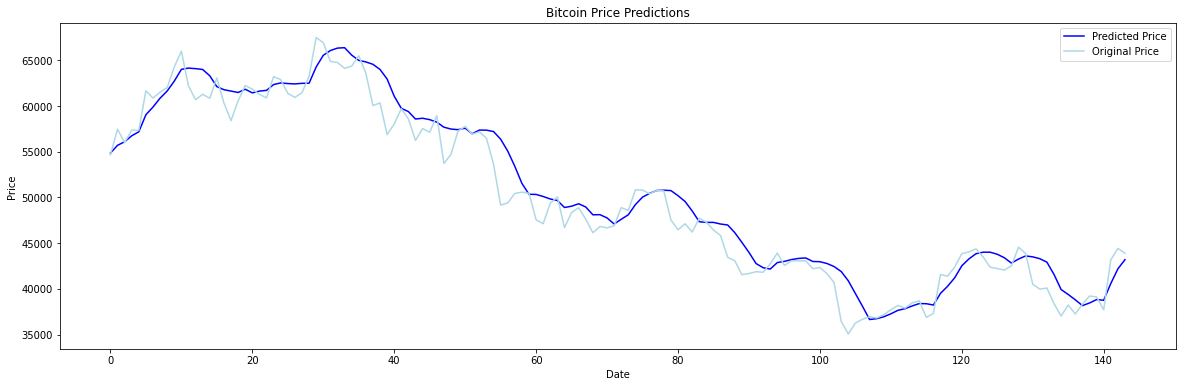

In [30]:
plt.plot(pred, color = 'blue', label = 'Predicted Price')
plt.plot(y_test, color = 'lightblue', label = 'Original Price')
 
plt.title('Bitcoin Price Predictions')
plt.xlabel('Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()


# Prediction 

In [5]:
predict_feature = pd.read_csv('../datasets/predict_feature.csv')
predict_feature

,Compound_lag_1,Close_lag_1,Volume_lag_1,FundingRate_lag_1,Bitcoin_SVI_lag_1,Cryptocurrency_SVI_lag_1,No. of Active Addresses_lag_1,No. of Unique Addresses_lag_1,Transactions_lag_1,Compound_lag_2,...,Transactions_lag_4,Compound_lag_5,Close_lag_5,Volume_lag_5,FundingRate_lag_5,Bitcoin_SVI_lag_5,Cryptocurrency_SVI_lag_5,No. of Active Addresses_lag_5,No. of Unique Addresses_lag_5,Transactions_lag_5
0,0.534943,0.627184,0.63747,0.302376,0.196234,0.250625,0.464365,0.469446,0.28856,0.542383,...,0.21668,0.536957,0.572082,0.632606,0.269978,0.239212,0.216803,0.396952,0.43022,0.264083


In [32]:
close_mean = test['Close_mean'][-5:].mean()
close_std = test['Close_std'][-5:].mean()

In [33]:
model = XGBRegressor(seed=model_seed,
                     n_estimators=10,
                     max_depth=2,
                     learning_rate=0.016,
                     min_child_weight=1,
                     subsample=0.6,
                     colsample_bytree=0.5,
                     colsample_bylevel=0.6,
                     gamma=0.1)
model.fit(X_train_val_scaled,y_train_val_scaled)

/Users/colin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.016, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=100,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [34]:
est_scaled = model.predict(predict_feature)
est = est_scaled * close_std + close_mean
est[0]

40718.23

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.


Predicted: Our model predicted the currency to have a close price of USD 40991.34375 on 4 Mar 2022.